In [1]:
%matplotlib inline
import numpy as np
from utils.data import scale_standardize
from utils.train import h, calculate_cost, batch_gradient_descent
from utils.plot import plot_training

# Import data

This is heart data from the UMass Statistical Data website (http://www.umass.edu/statdata/statdata/stat-rmult.html)

In [2]:
dataset = np.genfromtxt('data/regression_heart.csv', delimiter=",")

x = dataset[:,1:]

print x.shape

y = dataset[:,0]
y = np.reshape(y, (y.shape[0],1))  # Reshape to a column vector

print y.shape

(200L, 16L)
(200L, 1L)



# Feature scaling

Standardize each feature and add a 1's column for bias

In [3]:
x = scale_standardize(x)
print x

[[ 1.         -1.33978769 -0.81353406 ...,  0.24002985  1.54045212
   1.45773797]
 [ 1.         -1.33978769  0.293315   ...,  3.08784157  1.50771486
   1.45773797]
 [ 1.         -0.35464968 -0.26010953 ...,  0.24002985  1.40950305
   1.45773797]
 ..., 
 [ 1.          0.63048832  0.293315   ..., -0.57363065 -0.68568207
  -0.68599434]
 [ 1.          0.63048832  0.84673954 ..., -0.57363065 -0.68568207
  -0.68599434]
 [ 1.         -1.33978769 -1.3669586  ..., -0.57363065 -0.68568207
  -0.68599434]]


# Notes

In the 1 predictor case...

The cost function for linear regression is
1/2m(sum((theta0 + theta1(x) - y) ^ 2))

Partial derivative wrt theta0: 1/m(sum(theta0 + theta1 - y))

Partial derivative wrt theta1: 1/m(sum(theta0 + theta1 - y)) * x

Parameter update: theta = theta - alpha(partial derivative)

# Evaluate hypothesis

All vectors are treated as column vectors. Here, X is a 200x18 feature matrix, and the weights are set as 18x1 column vector

Value of the hypothesis is just the dot product of X and the weights vector.

In [4]:
# Test that we correctly evaluate the hypothesis value for each training example
theta = np.ones((x.shape[1],1))
print h(theta, x)

[[ -2.25016668]
 [ -0.22651902]
 [ 11.65837543]
 [  8.96197326]
 [ -0.24931382]
 [ -0.24752679]
 [  7.50101967]
 [  9.44991996]
 [ 18.99885693]
 [ -0.32080326]
 [  4.11543407]
 [  0.6354412 ]
 [  0.08297097]
 [  2.92478898]
 [  3.66944734]
 [  4.69660935]
 [  3.74177951]
 [  5.71051871]
 [ -1.06723469]
 [  4.640479  ]
 [  2.00224547]
 [  8.0501603 ]
 [  2.63885583]
 [ -2.27405427]
 [  4.35470506]
 [  2.66107877]
 [  2.42463191]
 [  0.88318916]
 [  3.19136665]
 [  4.19170332]
 [  2.8796087 ]
 [ -0.46870855]
 [ -0.13259743]
 [  5.17023476]
 [  6.04974139]
 [ -3.65534757]
 [  5.92238718]
 [  0.8172726 ]
 [ -1.27633988]
 [  5.55078838]
 [  2.06634506]
 [ -5.66449707]
 [  4.40162539]
 [ 11.38509094]
 [ -2.31871013]
 [  6.94332761]
 [ -4.13798173]
 [ -8.8337238 ]
 [  5.11344114]
 [ -1.30612782]
 [ -0.46957487]
 [ -4.83202837]
 [  6.86784861]
 [  3.67477585]
 [ -0.33217919]
 [  3.18174876]
 [  0.33093839]
 [  0.06446038]
 [  1.40346599]
 [ 12.03193831]
 [  4.58726494]
 [  1.22201603]
 [  5.63

# Calculate cost

For each training example we calculate the total residual value using all available predictors.

Then we square each residual/error value (and sum across all training examples) with the dot product. The average squared error is then returned as the cost/loss value

In [5]:
# Test that we return a scalar cost value, calculated across all training examples and all features for a given set of weights
print calculate_cost(theta, x, y)[1]

[[ 1076.21645647]]


# Gradient Descent

Simultaneously update the weight values after calculating the partial derivative

In [6]:
# Test gradient descent over 10 iterations
initial_weights = np.ones((x.shape[1],1))
history, final_weights = batch_gradient_descent(initial_weights, x, y, iterations = 10)            

Iteration: 1 | Cost: 1076.216456
Iteration: 2 | Cost: 1076.214338
Iteration: 3 | Cost: 1076.212220
Iteration: 4 | Cost: 1076.210101
Iteration: 5 | Cost: 1076.207983
Iteration: 6 | Cost: 1076.205864
Iteration: 7 | Cost: 1076.203746
Iteration: 8 | Cost: 1076.201627
Iteration: 9 | Cost: 1076.199509
Iteration: 10 | Cost: 1076.197391


#  Plot training curve

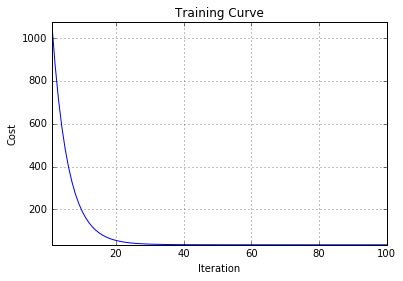

In [7]:
# Test training curve plotting
initial_weights = np.ones((x.shape[1],1))
history, final_weights = batch_gradient_descent(initial_weights, x, y, iterations = 100, alpha = 0.1, verbose = False)
plot_training(history)